# Analyzing single-lineage models

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
from speclet.analysis.arviz_analysis import extract_coords_param_names
from speclet.analysis.sublineage_model_analysis import (
    load_sublineage_model_posteriors,
    sublineage_to_lineage_map,
)
from speclet.managers.posterior_data_manager import (
    PosteriorDataManager,
    PosteriorDataManagers,
)
from speclet.plot import set_speclet_theme
from speclet.plot.color_pal import (
    lineage_color_pal,
    pal_to_legend_handles,
    sublineage_color_pal,
)
from speclet.project_configuration import arviz_config

In [11]:
# Notebook execution timer.
notebook_tic = time()

# Plotting setup.
set_speclet_theme()
%config InlineBackend.figure_format = "retina"

# Constants
RANDOM_SEED = 709
np.random.seed(RANDOM_SEED)
arviz_config()

### Data

#### Model posteriors

In [12]:
postmen = load_sublineage_model_posteriors()

In [13]:
postmen.keys

['bile duct (cholangiocarcinoma)',
 'bile duct (gallbladder adenocarcinoma)',
 'blood (ALL)',
 'blood (AML)',
 'blood (CLL)',
 'blood (CML)',
 'bone (Ewing sarcoma)',
 'bone (chordoma)',
 'bone (osteosarcoma)',
 'breast',
 'central nervous system (glioma)',
 'central nervous system (medulloblastoma)',
 'cervix (cervical carcinoma)',
 'cervix (cervical squamous)',
 'colorectal',
 'esophagus (esophagus adenocarcinoma)',
 'esophagus (esophagus squamous)',
 'eye (uveal melanoma)',
 'gastric (gastric adenocarcinoma)',
 'kidney (renal cell carcinoma)',
 'liver (hepatocellular carcinoma)',
 'lung (NSCLC)',
 'lung (SCLC)',
 'lung (mesothelioma)',
 'lymphocyte (hodgkin lymphoma)',
 'lymphocyte (lymphoma unspecified)',
 'lymphocyte (non hodgkin lymphoma)',
 'ovary (ovary adenocarcinoma)',
 'pancreas',
 'peripheral nervous system (neuroblastoma)',
 'plasma cell (multiple myeloma)',
 'prostate',
 'skin (melanoma)',
 'skin (skin squamous)',
 'soft tissue (ATRT)',
 'soft tissue (liposarcoma)',
 'sof

In [14]:
len(postmen)

43

In [15]:
sub_to_lineage, lineages = sublineage_to_lineage_map(postmen)

In [16]:
sublineage_pal = sublineage_color_pal()
lineage_pal = lineage_color_pal()

## Descriptions

In [17]:
def get_posterior_dimensions(pm: PosteriorDataManager) -> pd.DataFrame:
    try:
        res = pd.DataFrame(
            {k: v for k, v in pm.trace.posterior.dims.items()}, index=[pm.id]
        )
    except AssertionError:
        print(f"Skipping {pm.id}.")
        return pd.DataFrame()

    return res


post_dims = pd.concat([get_posterior_dimensions(pm) for pm in postmen.posteriors])
post_dims = post_dims.loc[:, ["dim_" not in cn for cn in post_dims.columns]]
post_dims

,chain,draw,sgrna,cell_chrom,gene,cancer_gene,cell_line
bile duct (cholangiocarcinoma),4,1000,71062,713,18119,1.0,31
bile duct (gallbladder adenocarcinoma),4,1000,71062,138,18119,NaN,6
blood (ALL),4,1000,71062,345,18119,11.0,15
blood (AML),4,1000,71062,575,18119,3.0,25
blood (CLL),4,1000,71062,92,18119,NaN,4
blood (CML),4,1000,71062,161,18119,NaN,7
bone (Ewing sarcoma),4,1000,71062,368,18119,NaN,16
bone (chordoma),4,1000,71062,92,18119,NaN,4
bone (osteosarcoma),4,1000,71062,207,18119,NaN,9
breast,4,1000,71062,874,18119,5.0,38


## Analysis

In [18]:
def summarize_variable_per_lineage(
    pms: PosteriorDataManagers,
    var_name: str,
    extract_names: str | list[str] | None = None,
) -> pd.DataFrame:
    posteriors = pd.DataFrame()

    for lineage, lineage_pm in postmen.as_dict().items():
        try:
            post = (
                lineage_pm.posterior_summary.query(f"var_name == '{var_name}'")
                .reset_index(drop=True)
                .assign(lineage=lineage)
            )
        except FileNotFoundError:
            print(f"Skipping {lineage_pm.id}.")
            continue

        if len(post) == 0:
            continue

        if extract_names is not None:
            post = extract_coords_param_names(
                post, names=extract_names, col="parameter"
            )

        posteriors = pd.concat([posteriors, post])

    return posteriors.reset_index(drop=True)

In [19]:
mu_a_posteriors = summarize_variable_per_lineage(
    postmen, var_name="mu_a", extract_names="hugo_symbol"
)
mu_a_posteriors.head()

,parameter,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,var_name,lineage,hugo_symbol
0,mu_a[A1BG],0.322,0.122,0.134,0.522,0.002,0.002,2686.0,3015.0,1.0,mu_a,bile duct (cholangiocarcinoma),A1BG
1,mu_a[A1CF],0.268,0.122,0.064,0.455,0.002,0.002,3291.0,2986.0,1.0,mu_a,bile duct (cholangiocarcinoma),A1CF
2,mu_a[A2M],0.176,0.123,-0.025,0.365,0.002,0.002,3137.0,2943.0,1.0,mu_a,bile duct (cholangiocarcinoma),A2M
3,mu_a[A2ML1],0.320,0.125,0.122,0.525,0.002,0.002,3025.0,3113.0,1.0,mu_a,bile duct (cholangiocarcinoma),A2ML1
4,mu_a[A3GALT2],0.114,0.124,-0.087,0.308,0.002,0.002,2949.0,3087.0,1.0,mu_a,bile duct (cholangiocarcinoma),A3GALT2


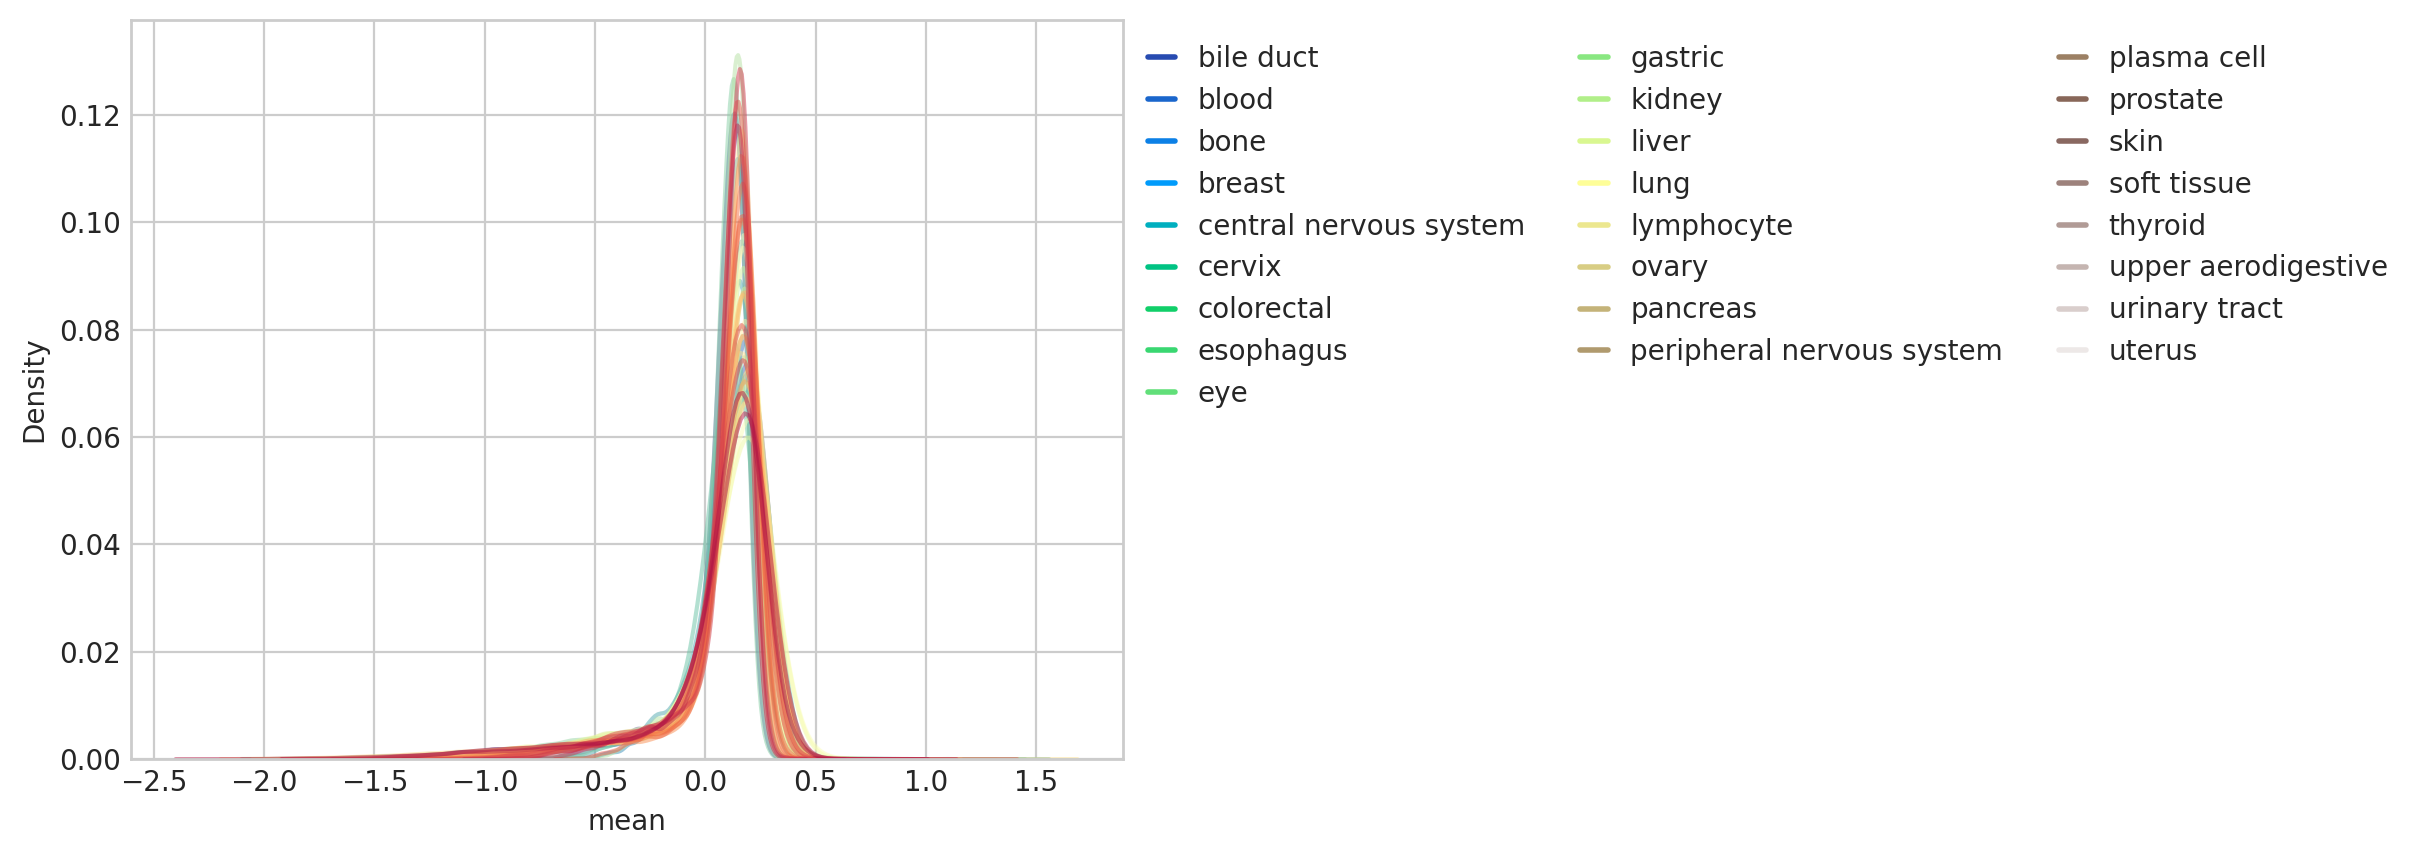

In [20]:
ax = sns.kdeplot(
    data=mu_a_posteriors, x="mean", hue="lineage", alpha=0.5, palette=sublineage_pal
)
ax.legend(
    handles=pal_to_legend_handles(lineage_pal, lw=2),
    handlelength=1,
    ncol=3,
    loc="upper left",
    bbox_to_anchor=(1, 1),
)
plt.show()

(0.0, 100.0)

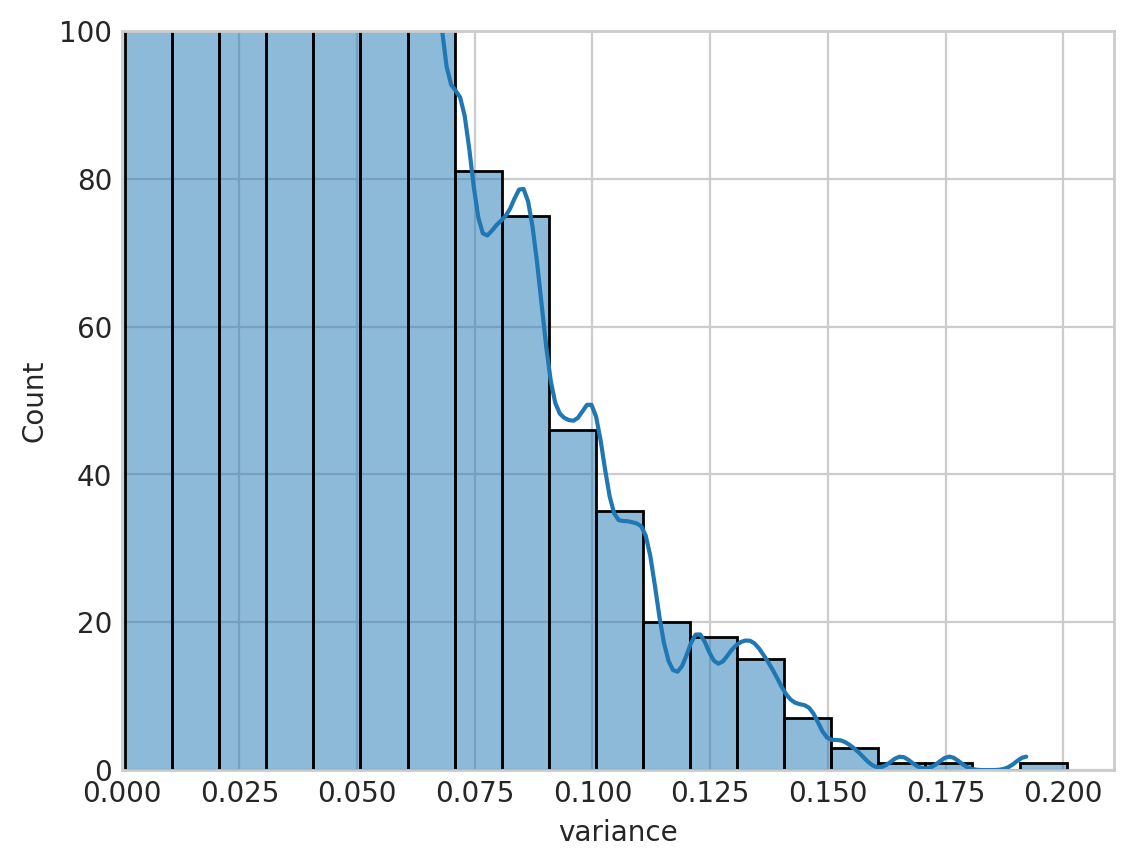

In [21]:
mu_a_posterior_variability = (
    mu_a_posteriors.groupby("hugo_symbol")["mean"]
    .var()
    .reset_index()
    .rename(columns={"mean": "variance"})
)
ax = sns.histplot(
    data=mu_a_posterior_variability, x="variance", binwidth=0.01, kde=True
)
ax.set_xlim(0, None)
ax.set_ylim(0, 100)

In [22]:
mu_a_posterior_variability.sort_values(["variance"], ascending=False).head(15)

,hugo_symbol,variance
12642,RAN,0.192135
16644,TXNL4A,0.175813
7774,KIF11,0.165502
16203,TP53,0.156218
13236,RPL4,0.152957
11831,POLR2L,0.151450
669,ANKLE2,0.147340
6976,HSPE1,0.146923
4599,EIF1AX,0.146134
12291,PSMB5,0.145099


In [23]:
k_posteriors = (
    summarize_variable_per_lineage(postmen, var_name="k", extract_names="cell_chrom")
    .rename(columns={"lineage": "sublineage"})
    .assign(
        depmap_id=lambda d: [x.split("__")[0] for x in d["cell_chrom"]],
        sgrna_target_chr=lambda d: [x.split("__")[1] for x in d["cell_chrom"]],
        lineage=lambda d: d["sublineage"].map(sub_to_lineage),
    )
)
k_posteriors.head()

,parameter,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,var_name,sublineage,cell_chrom,depmap_id,sgrna_target_chr,lineage
0,k[ACH-000182__1],0.058,0.021,0.025,0.091,0.001,0.001,409.0,930.0,1.01,k,bile duct (cholangiocarcinoma),ACH-000182__1,ACH-000182,1,bile duct
1,k[ACH-000182__2],-0.045,0.022,-0.079,-0.010,0.001,0.001,458.0,1026.0,1.01,k,bile duct (cholangiocarcinoma),ACH-000182__2,ACH-000182,2,bile duct
2,k[ACH-000182__3],-0.025,0.022,-0.059,0.011,0.001,0.001,487.0,868.0,1.01,k,bile duct (cholangiocarcinoma),ACH-000182__3,ACH-000182,3,bile duct
3,k[ACH-000182__4],0.027,0.023,-0.007,0.067,0.001,0.001,500.0,1280.0,1.01,k,bile duct (cholangiocarcinoma),ACH-000182__4,ACH-000182,4,bile duct
4,k[ACH-000182__5],-0.041,0.023,-0.077,-0.003,0.001,0.001,465.0,831.0,1.01,k,bile duct (cholangiocarcinoma),ACH-000182__5,ACH-000182,5,bile duct


/home/jc604/.conda/envs/speclet/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


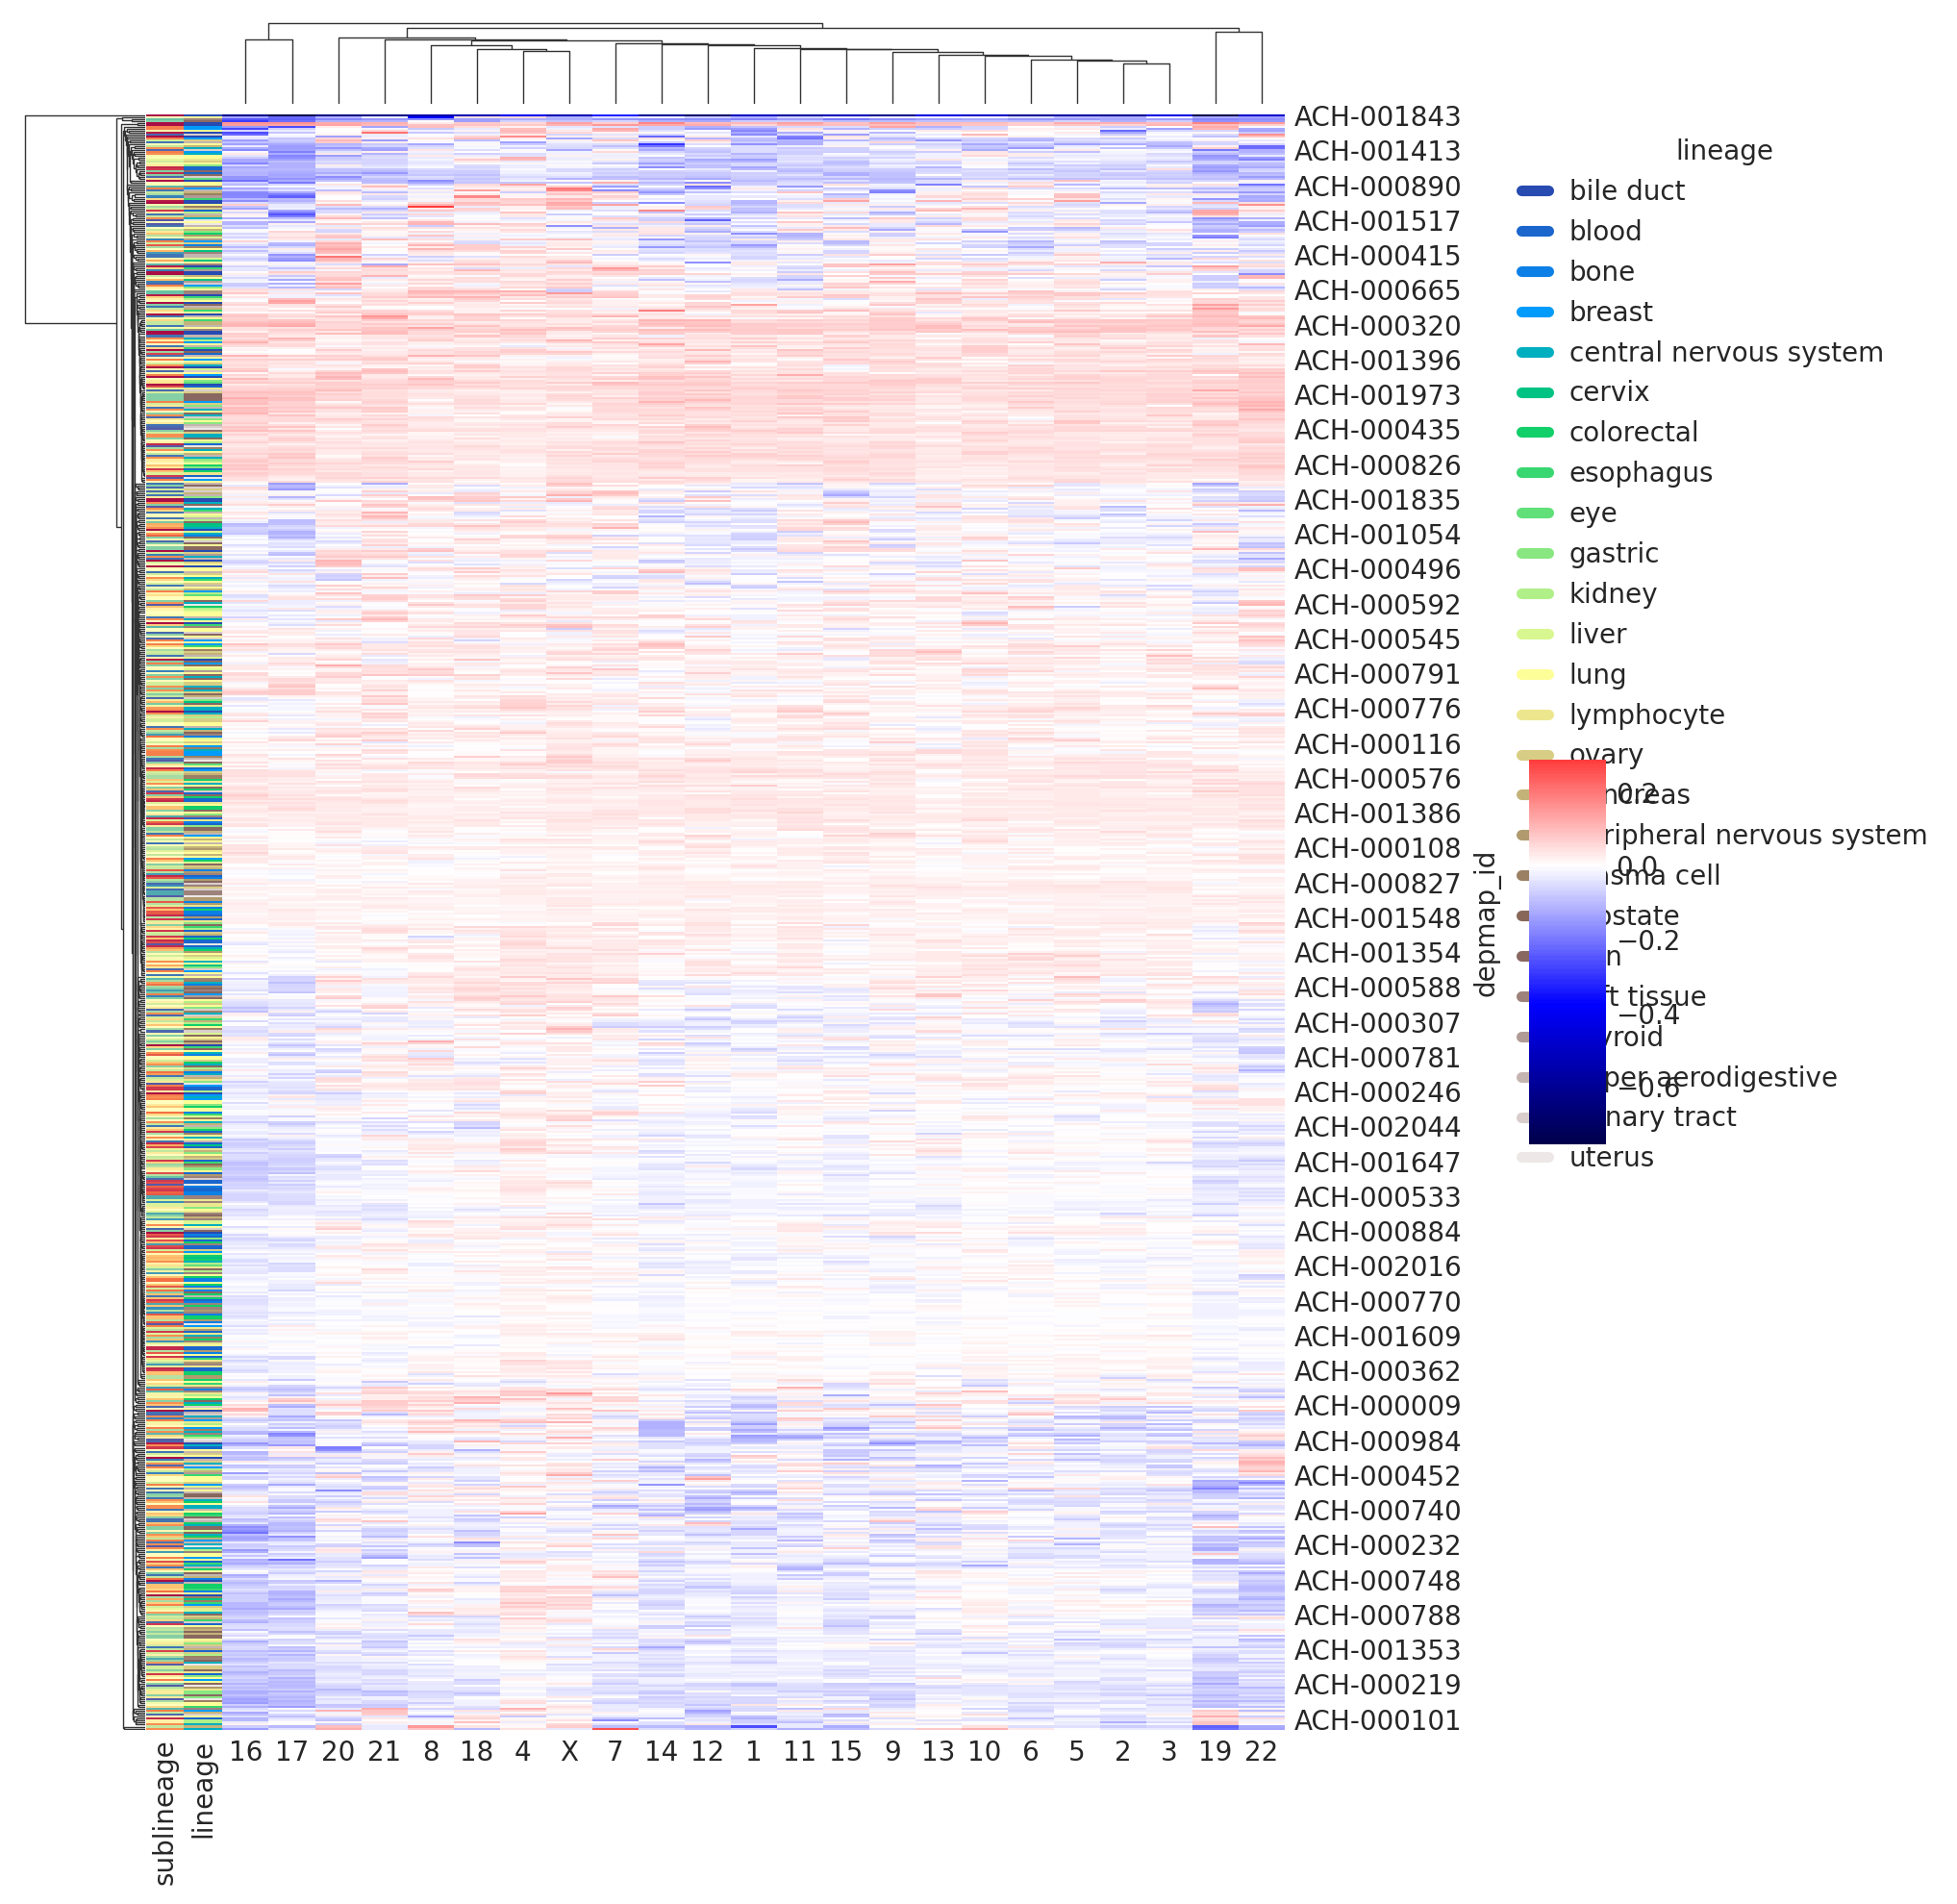

In [24]:
row_colors = (
    k_posteriors[["sublineage", "lineage", "depmap_id"]]
    .drop_duplicates()
    .set_index("depmap_id")
    .assign(
        lineage=lambda d: d["lineage"].map(lineage_pal),
        sublineage=lambda d: d["sublineage"].map(sublineage_pal),
    )
)

k_posteriors_wide = k_posteriors.pivot_wider(
    index="depmap_id", names_from="sgrna_target_chr", values_from="mean"
).set_index("depmap_id")
fg = sns.clustermap(
    k_posteriors_wide,
    cmap="seismic",
    center=0,
    row_colors=row_colors,
    figsize=(8, 10),
    cbar_pos=(1, 0.4, 0.05, 0.2),
    dendrogram_ratio=(0.1, 0.05),
)
fg.ax_heatmap.legend(
    handles=pal_to_legend_handles(lineage_pal, lw=4),
    title="lineage",
    loc="upper left",
    bbox_to_anchor=(1.2, 1),
    handlelength=1,
    frameon=False,
)
plt.show()

In [25]:
f_posteriors = summarize_variable_per_lineage(
    postmen, var_name="f", extract_names="hugo_symbol"
)
f_posteriors.head()

,parameter,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,var_name,lineage,hugo_symbol
0,f[A1BG],-0.004,0.118,-0.191,0.188,0.001,0.002,11435.0,2669.0,1.0,f,bile duct (cholangiocarcinoma),A1BG
1,f[A1CF],-0.017,0.095,-0.160,0.141,0.001,0.002,11474.0,3054.0,1.0,f,bile duct (cholangiocarcinoma),A1CF
2,f[A2M],-0.008,0.089,-0.156,0.127,0.001,0.002,11872.0,2954.0,1.0,f,bile duct (cholangiocarcinoma),A2M
3,f[A2ML1],0.015,0.092,-0.141,0.158,0.001,0.002,11758.0,2482.0,1.0,f,bile duct (cholangiocarcinoma),A2ML1
4,f[A3GALT2],0.074,0.104,-0.092,0.237,0.001,0.002,11281.0,2660.0,1.0,f,bile duct (cholangiocarcinoma),A3GALT2


In [26]:
hdi_outside_zero = (f_posteriors["hdi_5.5%"] * f_posteriors["hdi_94.5%"]).values > 0
effect_size_filter = f_posteriors["mean"].abs().values > 0.1
f_posteriors["hit"] = hdi_outside_zero * effect_size_filter

/home/jc604/.conda/envs/speclet/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


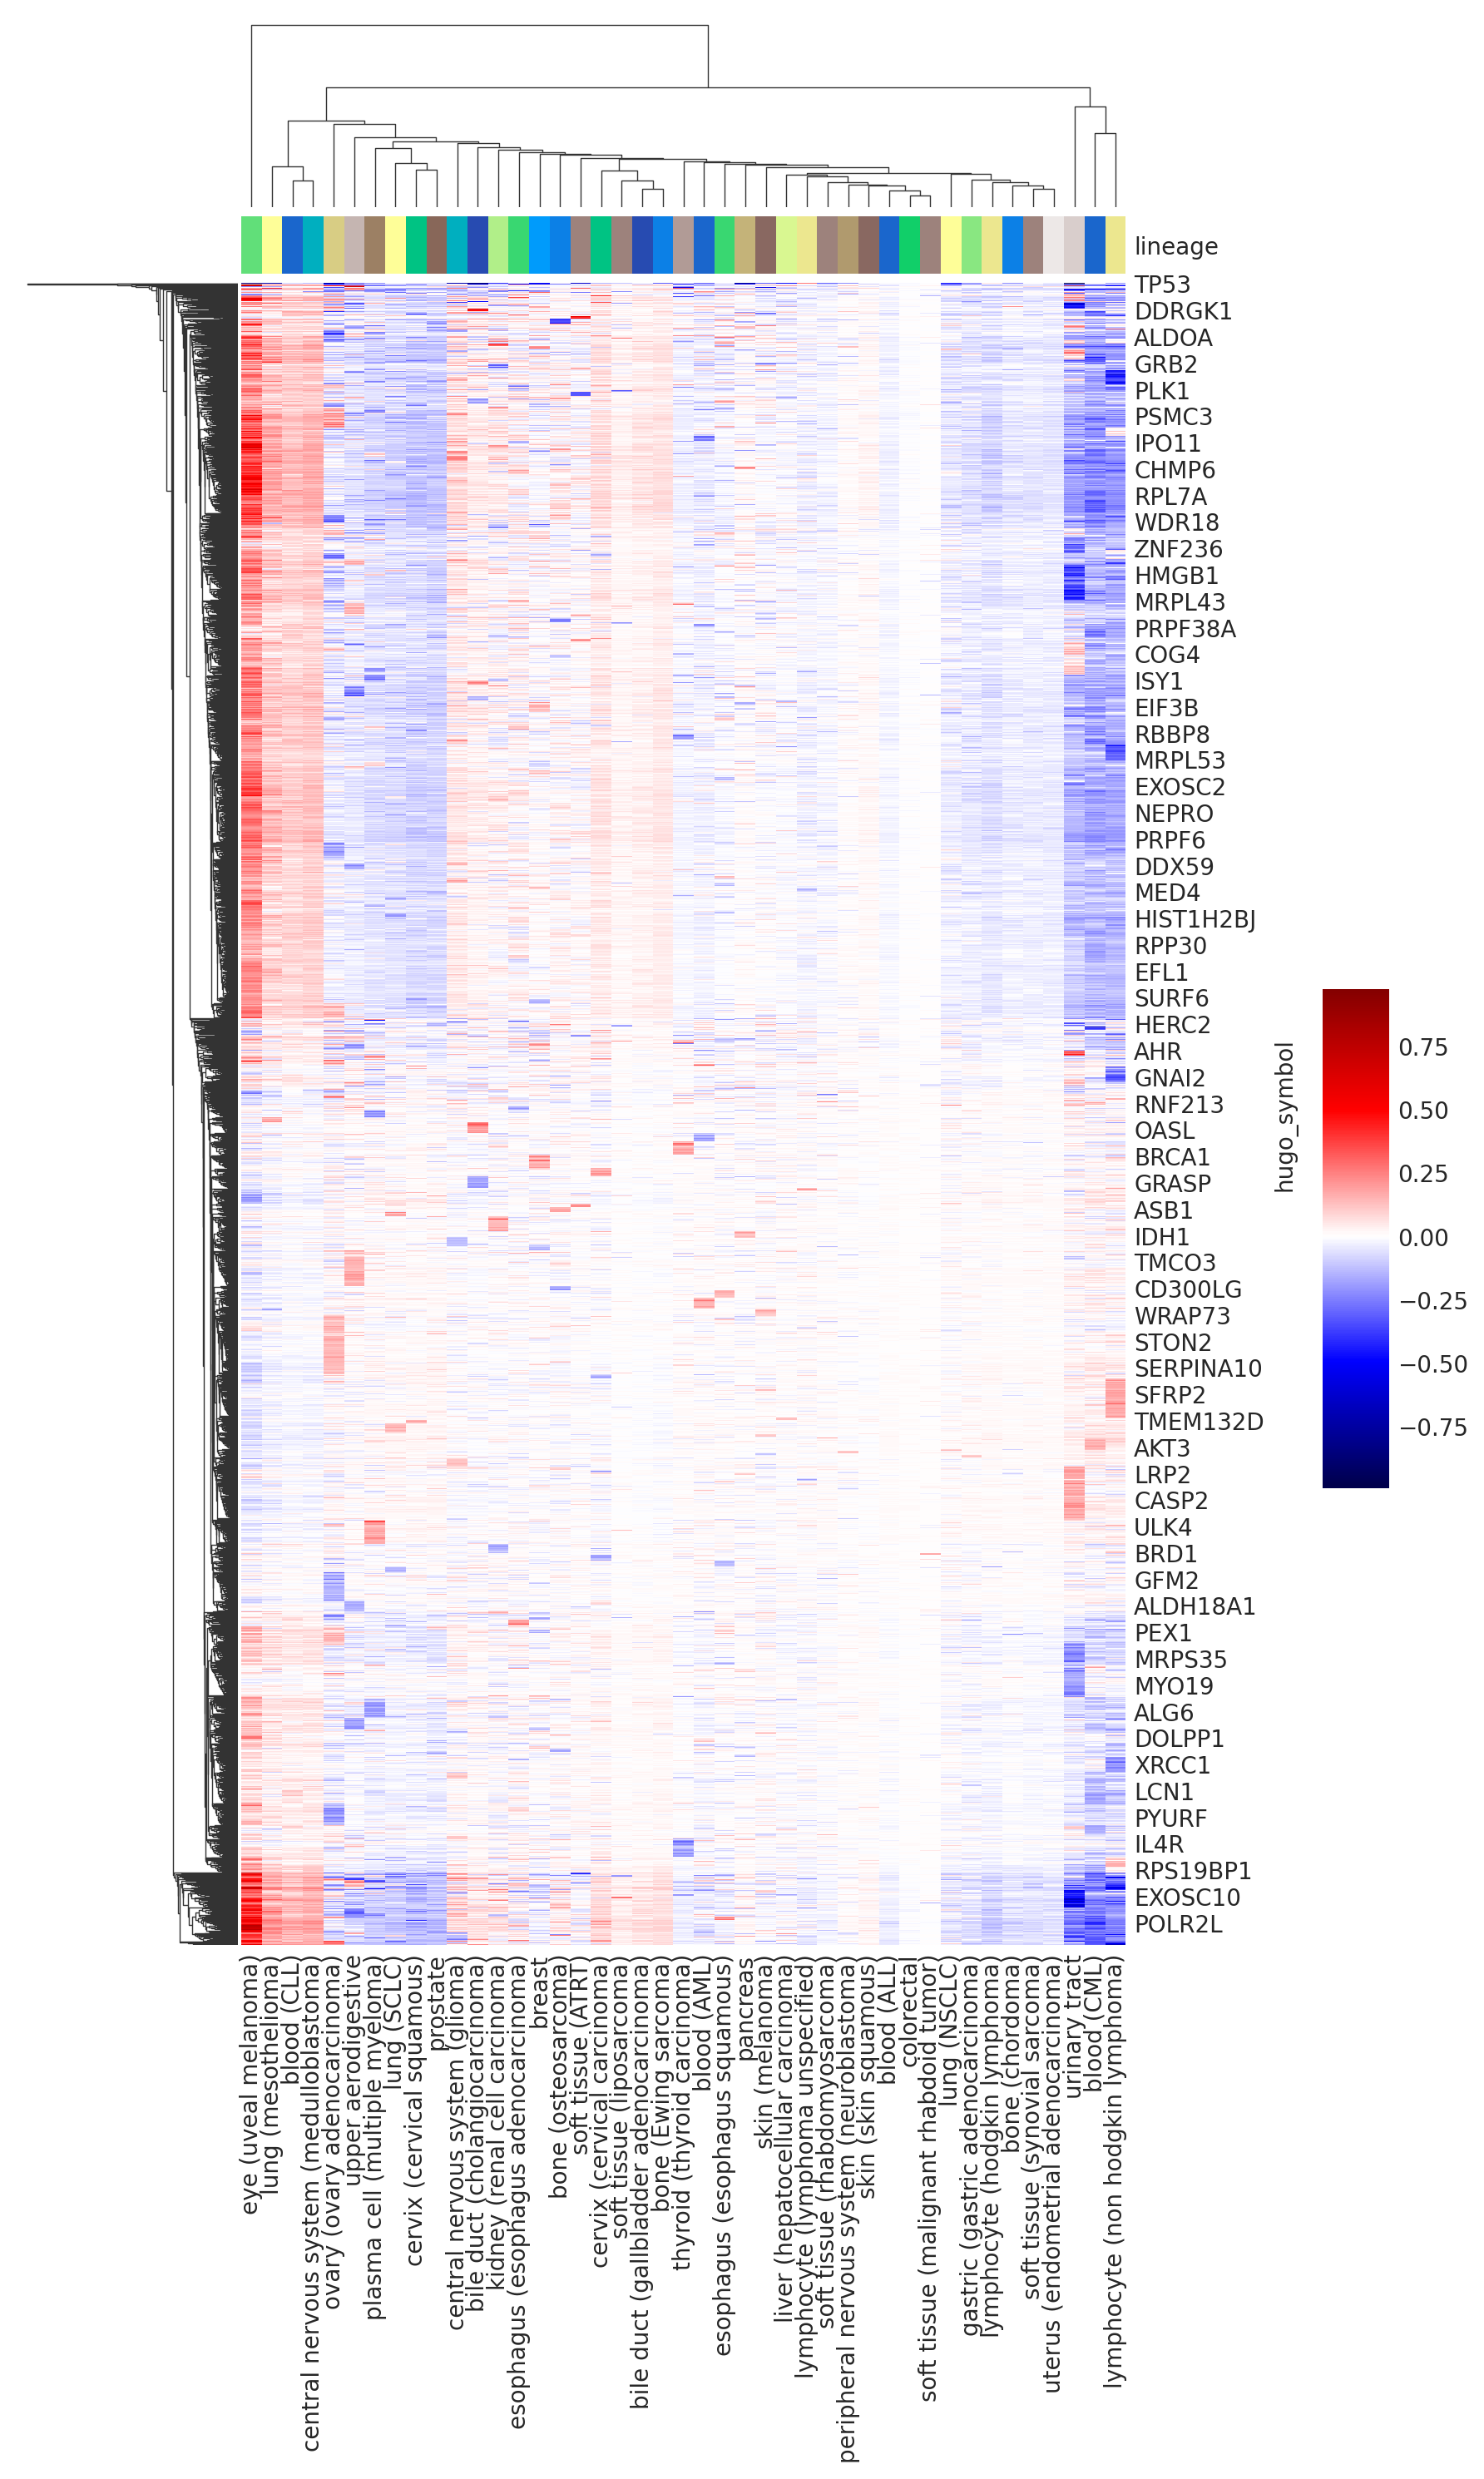

In [27]:
f_hit_genes = f_posteriors.query("hit")["hugo_symbol"].unique()
plot_df = (
    f_posteriors.filter_column_isin("hugo_symbol", f_hit_genes)
    .pivot_wider(index="hugo_symbol", names_from="lineage", values_from="mean")
    .set_index("hugo_symbol")
)

col_colors = (
    pd.DataFrame({"sublineage": plot_df.columns.tolist()})
    .assign(lineage=lambda d: d["sublineage"].map(sub_to_lineage).map(lineage_pal))
    .set_index("sublineage")
)

sns.clustermap(
    plot_df,
    cmap="seismic",
    center=0,
    figsize=(8, 15),
    dendrogram_ratio=(0.2, 0.1),
    cbar_pos=(1, 0.4, 0.05, 0.2),
    xticklabels=1,
    col_colors=col_colors,
)
plt.show()

Possible analyses:

- heatmap of posteriors of `k` and `m` by TP53 mutation status
- most variable genes in `f` to highlight tissue-specificity of dependency
- correlation network of lineages by `f`
- description of certain genes (eg. KRAS, PIK3CA, TP53) across all lineages
- for cancer genes that were in multiple lineages, compare the hits in the comutation variable

In [28]:
def filter_posterior_summmary_parameter(
    postmen: PosteriorDataManagers,
    pattern: str,
    var_names: str | list[str] | None = None,
) -> pd.DataFrame:
    res: list[pd.DataFrame] = []
    for lineage, lineage_pm in postmen.as_dict().items():
        try:
            df = lineage_pm.posterior_summary.filter_string(
                "parameter", pattern
            ).assign(lineage=lineage)
        except FileNotFoundError:
            print(f"Skipping {lineage_pm.id}.")
            df = pd.DataFrame()

        res.append(df)

    res_df = pd.concat(res)
    if var_names is not None:
        if isinstance(var_names, str):
            var_names = [var_names]
        res_df = res_df.filter_column_isin("var_name", var_names)

    return res_df.reset_index(drop=True)

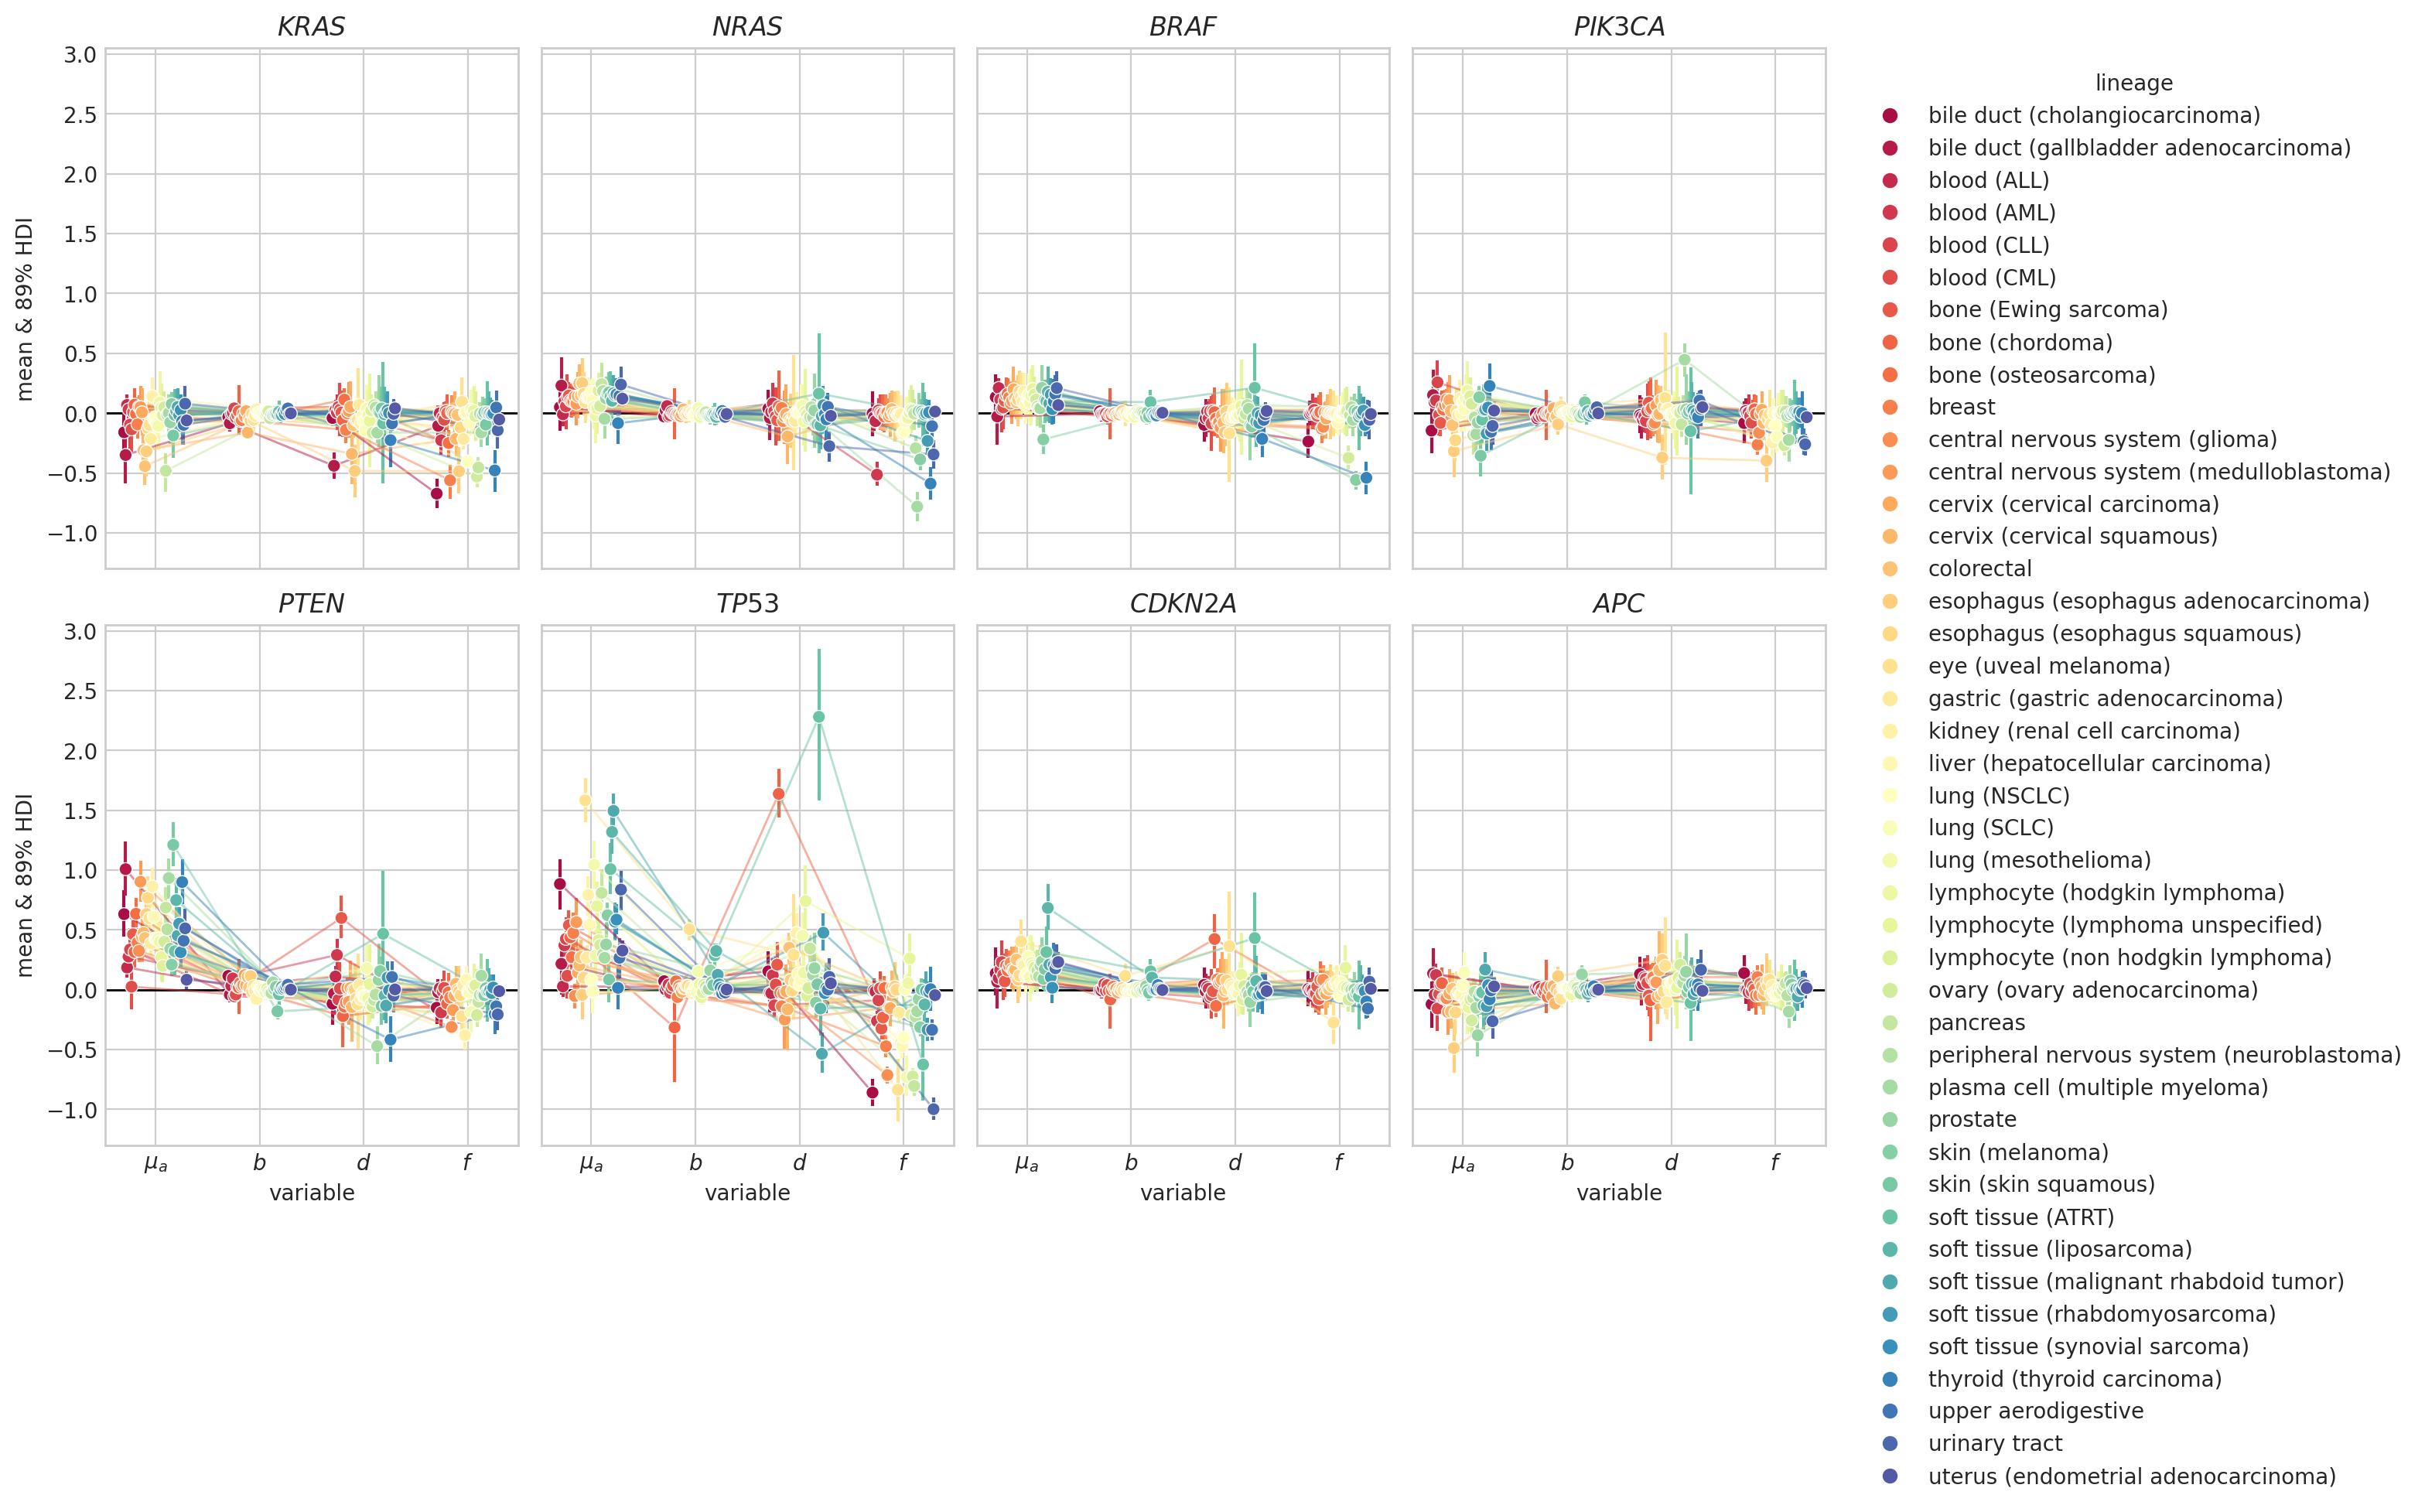

In [29]:
genes = ["KRAS", "NRAS", "BRAF", "PIK3CA", "PTEN", "TP53", "CDKN2A", "APC"]
var_names = {"mu_a": r"$\mu_a$", "b": "$b$", "d": "$d$", "f": "$f$"}

fig, axes = plt.subplots(
    nrows=2, ncols=len(genes) // 2, figsize=(12, 8), sharex=True, sharey=True
)

dx = np.linspace(-0.3, 0.3, len(postmen))
dodge = {line: dx[i] for i, line in enumerate(postmen.keys)}

for ax, gene in zip(axes.flatten(), genes):
    ax.set_title(f"${gene}$")
    data = filter_posterior_summmary_parameter(
        postmen, f"{gene}]", var_names=list(var_names.keys())
    )
    data["var_name"] = pd.Categorical(
        data["var_name"], categories=list(var_names.keys())
    )
    _x = data["var_name"].cat.codes
    _x += np.array([dodge[line] for line in data["lineage"]])
    data["x"] = _x

    colors = data["lineage"].map(sublineage_pal).values
    ax.vlines(x=data["x"], ymin=data["hdi_5.5%"], ymax=data["hdi_94.5%"], colors=colors)
    sns.scatterplot(
        data=data,
        x="x",
        y="mean",
        hue="lineage",
        palette=sublineage_pal,
        ax=ax,
        zorder=10,
    )
    sns.lineplot(
        data=data,
        x="x",
        y="mean",
        hue="lineage",
        palette=sublineage_pal,
        ax=ax,
        zorder=5,
        alpha=0.5,
        linewidth=1,
    )
    ax.get_legend().remove()
    ax.axhline(0, color="k", lw=1, zorder=1)
    ax.set_xticks(
        ticks=np.arange(data["var_name"].nunique()),
        labels=[var_names[v] for v in data["var_name"].cat.categories],
    )

fig.legend(
    handles=pal_to_legend_handles(sublineage_pal, lw=0, marker="o"),
    title="lineage",
    loc="upper left",
    bbox_to_anchor=(1, 0.95),
)

for ax in axes[:, 0]:
    ax.set_ylabel("mean & 89% HDI")
for ax in axes[-1, :]:
    ax.set_xlabel("variable")

fig.tight_layout()
plt.show()

In [30]:
def get_cancer_genes(pm: PosteriorDataManager) -> list[str]:
    try:
        if (cgs := pm.trace.posterior.coords.get("cancer_gene")) is None:
            return []
        return cgs.values.tolist()
    except AssertionError:
        print(f"Skipping {pm.id}.")
        return []


def get_all_cancer_genes(postmen: PosteriorDataManagers) -> dict[str, list[str]]:
    cgs: dict[str, list[str]] = {}
    for lineage, pm in postmen.as_dict().items():
        cgs[lineage] = get_cancer_genes(pm)
    return cgs

In [31]:
cancer_genes = get_all_cancer_genes(postmen)
cancer_genes

{'bile duct (cholangiocarcinoma)': ['BRAF'],
 'bile duct (gallbladder adenocarcinoma)': [],
 'blood (ALL)': ['BCORL1',
  'CREBBP',
  'CUX1',
  'EP300',
  'FAT1',
  'LRP1B',
  'MECOM',
  'MN1',
  'NRAS',
  'PML',
  'RPL22'],
 'blood (AML)': ['KMT2A', 'LRP1B', 'NRAS'],
 'blood (CLL)': [],
 'blood (CML)': [],
 'bone (Ewing sarcoma)': [],
 'bone (chordoma)': [],
 'bone (osteosarcoma)': [],
 'breast': ['ARID1A', 'BRCA2', 'NOTCH1', 'PIK3CA', 'TP53'],
 'central nervous system (glioma)': ['APC',
  'CDKN2C',
  'EGFR',
  'KMT2C',
  'KMT2D',
  'MLH1',
  'MTOR',
  'NF1',
  'PTEN',
  'TP53'],
 'central nervous system (medulloblastoma)': ['TP53'],
 'cervix (cervical carcinoma)': [],
 'cervix (cervical squamous)': [],
 'colorectal': ['APC', 'FBXW7', 'KRAS', 'PIK3CA', 'TP53'],
 'esophagus (esophagus adenocarcinoma)': [],
 'esophagus (esophagus squamous)': ['LRP1B'],
 'eye (uveal melanoma)': [],
 'gastric (gastric adenocarcinoma)': ['ATR',
  'CDH1',
  'PIK3CA',
  'PTPN13',
  'PTPRT',
  'ZFHX3'],
 'kidn

In [32]:
h_post_summary = summarize_variable_per_lineage(
    postmen, var_name="h", extract_names=["hugo_symbol", "cancer_gene"]
)

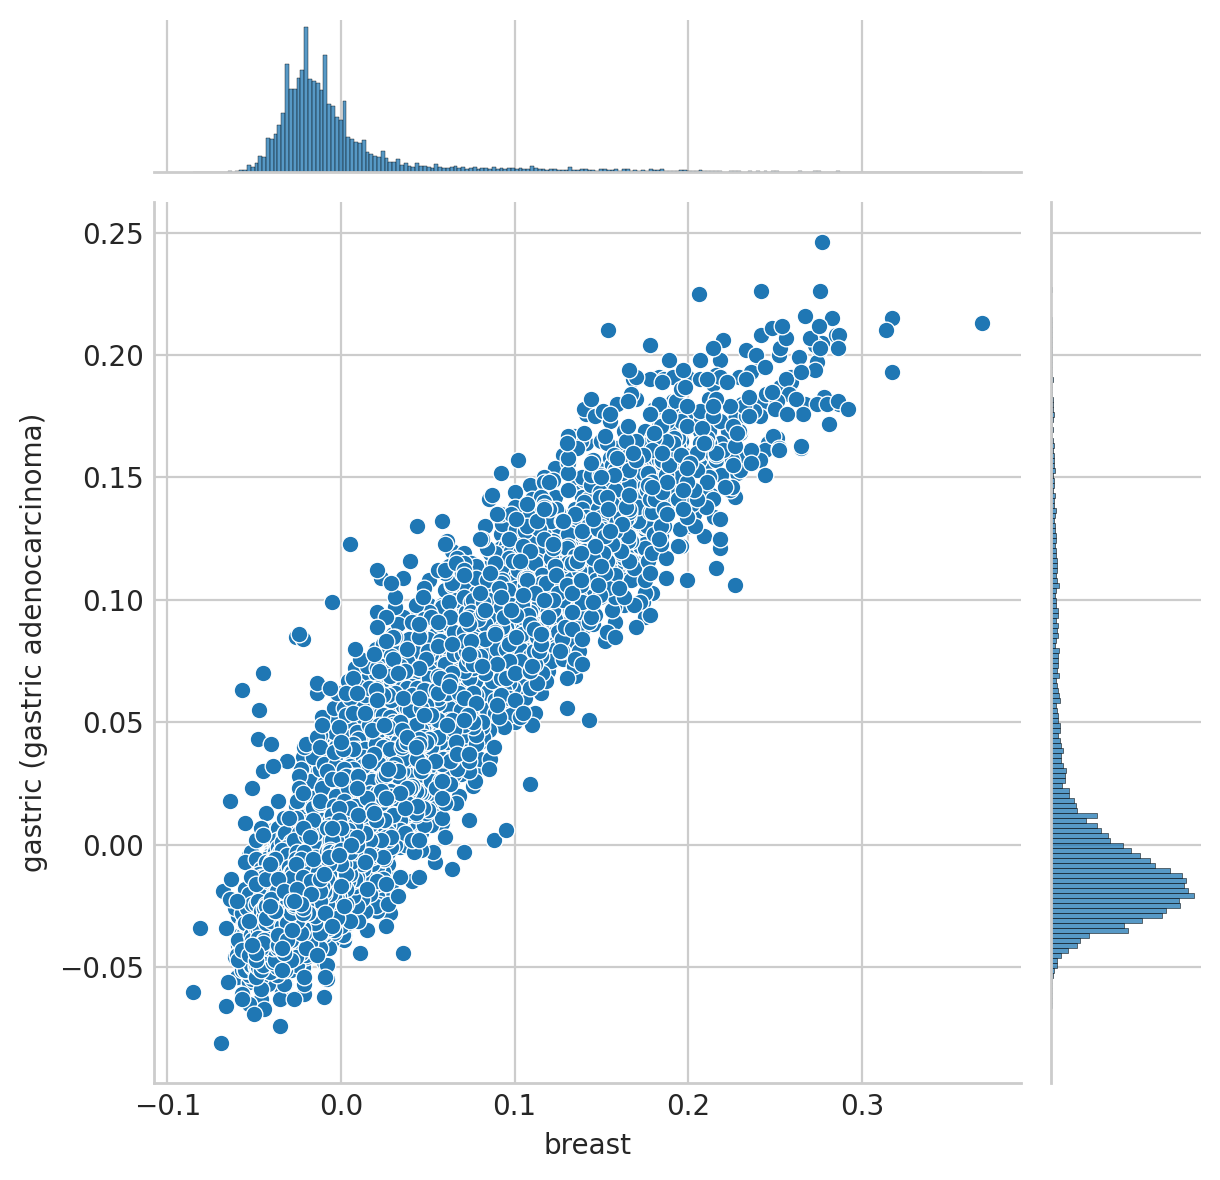

In [33]:
pik3ca_h_post_summary = (
    h_post_summary.filter_column_isin("cancer_gene", ["PIK3CA"])
    .reset_index(drop=True)
    .pivot_wider(index="hugo_symbol", names_from="lineage", values_from="mean")
)

sns.jointplot(
    data=pik3ca_h_post_summary, x="breast", y="gastric (gastric adenocarcinoma)"
);

---

In [34]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 1.81 minutes


In [35]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-10-06

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 3.10.0-1160.76.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 28
Architecture: 64bit

Hostname: compute-e-16-229.o2.rc.hms.harvard.edu

Git branch: figures

re        : 2.2.1
pandas    : 1.4.4
numpy     : 1.23.3
seaborn   : 0.11.2
matplotlib: 3.5.3

